In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

# Import LogoMaker
import logomaker

%matplotlib inline
plt.ion()

In [2]:
# Read in sortseq data
wtseq = 'AATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG'
L = len(wtseq)
poss = range(-L,0)
df_wt = pd.read_csv('data/full-wt-formatted.txt', delim_whitespace=True)
df_0 = pd.read_csv('data/full-0-formatted.txt', delim_whitespace=True)

In [3]:
parameters_text = """
colors : 'tomato'
logo_type : 'enrichment'
enrichment_centering : True
axes_style : 'vlines'
highlight_sequence : 'AATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG'
#vline_color : 'gray'
xtick_spacing : 10
xtick_anchor : 5
vline_width : 1
highlight_colors : 'black'
font_family : 'sans'
font_weight : 'heavy'
below_flip : False
use_position_range : [-74,-48]
stack_order : 'big_on_top'
show_vlines : True
show_binary_yaxis : True
ylabel : 'enrichment'
title : 'A title the user can edit'
"""
style_file = 'parameters_file.txt'
with open(style_file,'w') as f:
    f.write(parameters_text)

In [4]:
# Load counts matrix from files
counts_wt_mat = logomaker.load_alignment(sequences=df_wt['seq'], sequence_counts=df_wt['ct_9'])
counts_0_mat = logomaker.load_alignment(sequences=df_0['seq'], sequence_counts=df_0['ct_4'])
bg_mat = logomaker.load_alignment(sequences=df_wt['seq'], sequence_counts=df_wt['ct_0'])

In [5]:
# Make logos
logo1 = logomaker.make_styled_logo(style_file=style_file, print_params=False, 
                                   matrix=counts_wt_mat, background=bg_mat, positions=poss)
logo2 = logomaker.make_styled_logo(style_file=style_file, print_params=False, 
                                   matrix=counts_0_mat, background=bg_mat, positions=poss)

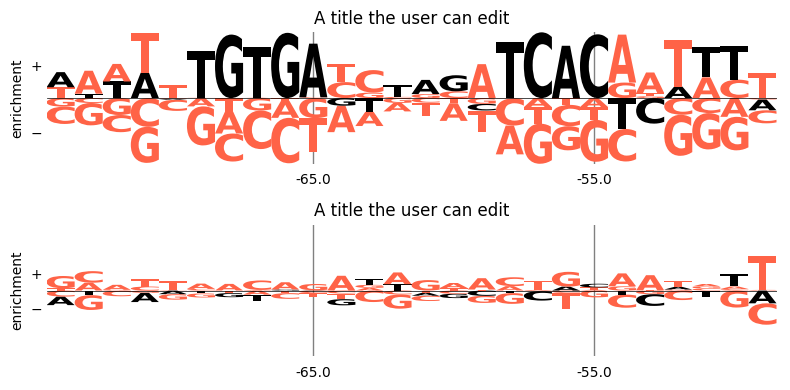

In [6]:
fig, axs = plt.subplots(2, figsize=[8,4])
logo1.draw(axs[0])
#axs[0].set_title('+ cAMP')
ylim = axs[0].get_ylim()

logo2.draw(axs[1])
#axs[1].set_title('- cAMP')
axs[1].set_ylim(ylim)

fig.tight_layout()